-Carregamento dos Dados

Aviso:
Abra o terminal e digite "pip install -r requirements.txt" para baixar todas as bibliotecas nescessarias

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek0032/youtube-dataset-all-data-scienceanalyst-channels")

# Mostra o local de dowload
print("Path to dataset files:", path)

Path to dataset files: C:\Users\pedro\.cache\kagglehub\datasets\abhishek0032\youtube-dataset-all-data-scienceanalyst-channels\versions\3


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:

dataset_path = "../Youtube_dataset_all_dataScience_channels.csv" # Coloque o nome do csv( ultilize o "../" antes do nome para encontrar o arquivo), se o nome for o mesmo não precisa alterar.
df = pd.read_csv(dataset_path)


In [23]:
print(df.head())
print(df.info())
print(df.describe())


     Channel_Name                                              Title  \
0  Rishabh Mishra  POWER BI Full PROJECT for Data Analysis with P...   
1  Rishabh Mishra  AI Revolution - Future of Data Analyst Jobs & ...   
2  Rishabh Mishra  Reality of Data Analyst Courses and Data Scien...   
3  Rishabh Mishra  Personal Portfolio Website for Beginners | How...   
4  Rishabh Mishra  How To Create LinkedIn Profile in 2024 | Linke...   

  Published_date     Views  Like_count  Comment_Count  
0     2024-04-20  157284.0      5575.0          632.0  
1     2024-03-23   78155.0      2712.0          245.0  
2     2024-03-16   43627.0      1285.0          267.0  
3     2024-01-21  129956.0      3462.0          358.0  
4     2024-01-17  143309.0      3389.0          192.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Channel_Name    23002 non-nu

Limpeza e Processamento de Dados.

In [30]:
# Verifica valores que faltam
print(df.isnull().sum())

Channel_Name      0
Title             0
Published_date    0
Views             0
Like_count        0
Comment_Count     0
dtype: int64


In [27]:
# Preenche valores nulos com zero
df.fillna(0, inplace=True)  

In [29]:
#Remove valores duplicados
df.drop_duplicates(inplace=True)

In [41]:
# Verifica inconsistências nos dados
df = df[df['Like_count'] >= 0]  # Filtra para manter apenas valores positivos

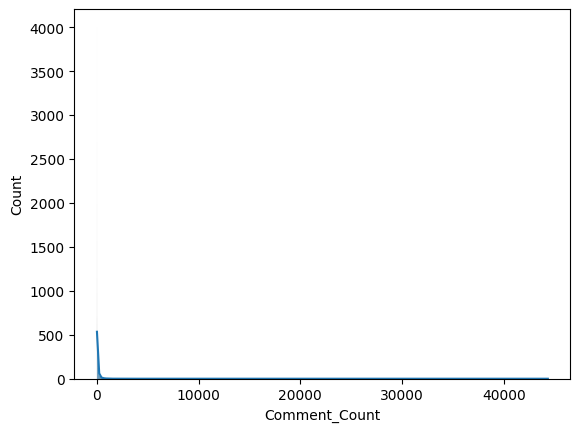

In [43]:
#Analisa as variáveis para entender padrões:

sns.histplot(df['Comment_Count'], kde=True)
plt.show()


-Análise Exploratório

In [82]:
# Agrupando por canal e somando as visualizações
total_views_per_channel = df.groupby('Channel_Name')['Views'].sum().reset_index()

# Ordenando pelos canais com mais visualizações
top_channels = total_views_per_channel.sort_values(by='Views', ascending=False).head(5)

# Exibindo os 10 canais com mais visualizações
print(top_channels)


        Channel_Name        Views
27  freeCodeCamp.org  725320015.0
12   Kevin Stratvert  422515221.0
25       WsCube Tech  292430002.0
14     Leila Gharani  253842158.0
7         ExcelIsFun  154836529.0


In [79]:
# Contar o número de vídeos por canal
video_count_per_channel = df['Channel_Name'].value_counts().reset_index()
video_count_per_channel.columns = ['Channel_Name', 'Video_Count']

# Exibindo os 10 canais com mais vídeos
print(video_count_per_channel.head(10))


       Channel_Name  Video_Count
0       WsCube Tech         5167
1        ExcelIsFun         3698
2        Krish Naik         1836
3  freeCodeCamp.org         1674
4           sentdex         1254
5           CampusX         1051
6     Guy in a Cube         1039
7        codebasics          881
8   Kevin Stratvert          858
9         Socratica          661


In [85]:
# Agrupando por canal para somar visualizações
total_views_per_channel = df.groupby('Channel_Name')['Views'].sum().reset_index()

# Contar o número de vídeos por canal
video_count_per_channel = df['Channel_Name'].value_counts().reset_index()
video_count_per_channel.columns = ['Channel_Name', 'Video_Count']

# Unir os dois DataFrames
channel_stats = pd.merge(total_views_per_channel, video_count_per_channel, on='Channel_Name')

# Ordenar pelo total de visualizações
channel_stats = channel_stats.sort_values(by='Views', ascending=False)

# Exibir os 10 primeiros
print(channel_stats.head(10))



                   Channel_Name        Views  Video_Count
27             freeCodeCamp.org  725320015.0         1674
12              Kevin Stratvert  422515221.0          858
25                  WsCube Tech  292430002.0         5167
14                Leila Gharani  253842158.0          584
7                    ExcelIsFun  154836529.0         3698
28                      sentdex  114931493.0         1254
13                   Krish Naik   99108897.0         1836
26                   codebasics   86203394.0          881
21  StatQuest with Josh Starmer   65995736.0          279
20                    Socratica   59555652.0          661


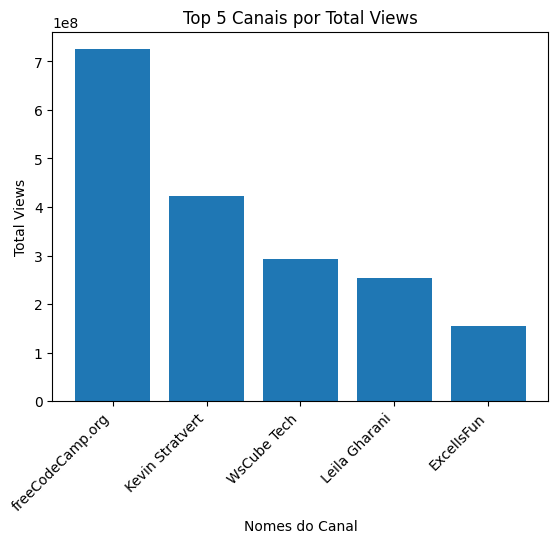

In [83]:
# Gráfico de barras para os canais com mais visualizações
plt.bar(top_channels['Channel_Name'], top_channels['Views'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Views')
plt.xlabel('Nomes do Canal')
plt.title('Top 5 Canais por Total Views')
plt.show()


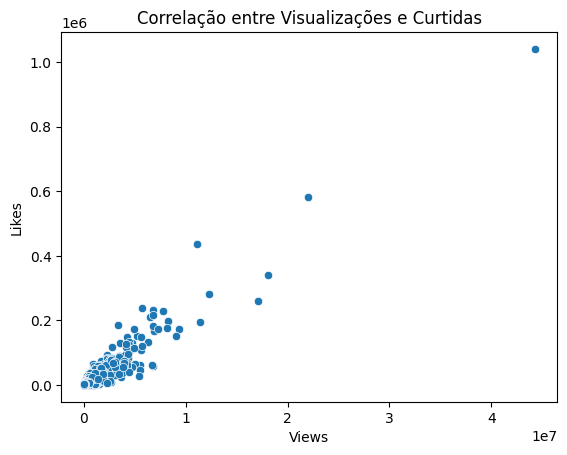

In [59]:
sns.scatterplot(x='Views', y='Like_count', data=df)
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Correlação entre Visualizações e Curtidas')
plt.show()

In [56]:
# Analisar a média de curtidas por canal
like_per_channel = df.groupby('Channel_Name')['Like_count'].mean().reset_index()
like_per_channel = like_per_channel.sort_values(by='Like_count', ascending=False)
print(like_per_channel.head(10))


                   Channel_Name    Like_count
1               Andrej Karpathy  18209.866667
14                Leila Gharani   9843.672945
27             freeCodeCamp.org   9619.768220
12              Kevin Stratvert   9265.022145
24                   Tina Huang   6346.594595
17               Rishabh Mishra   5960.659091
21  StatQuest with Josh Starmer   5136.878136
15                Luke Barousse   4735.213836
23        Thu Vu data analytics   3831.517241
10                  Keith Galli   3621.719101


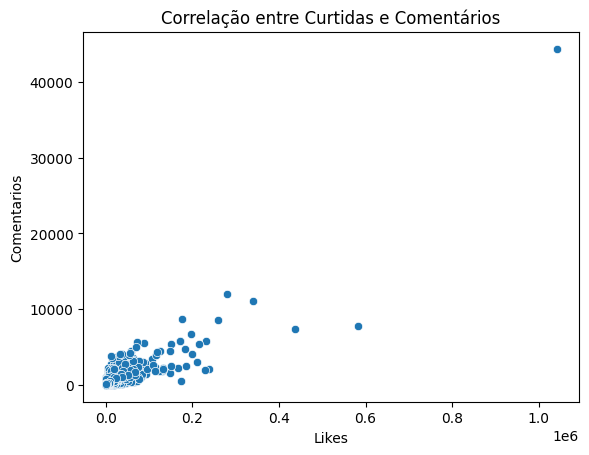

In [58]:
sns.scatterplot(x='Like_count', y='Comment_Count', data=df)
plt.xlabel('Likes')
plt.ylabel('Comentarios')
plt.title('Correlação entre Curtidas e Comentários')
plt.show()


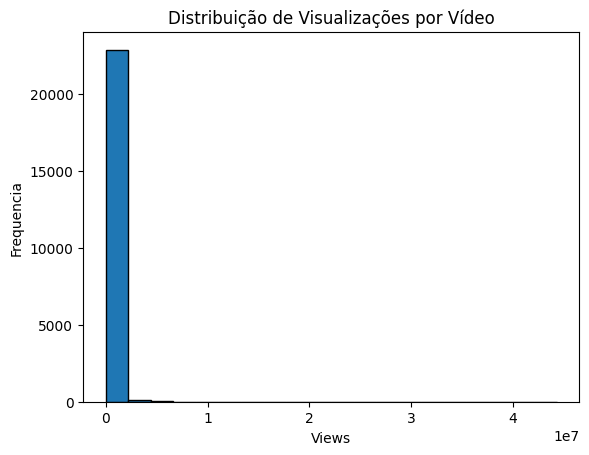

In [62]:
plt.hist(df['Views'], bins=20, edgecolor='k')
plt.xlabel('Views')
plt.ylabel('Frequencia')
plt.title('Distribuição de Visualizações por Vídeo')
plt.show()


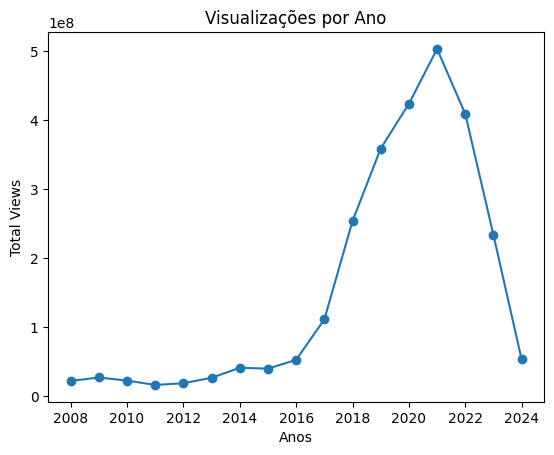

In [64]:
df['Published_date'] = pd.to_datetime(df['Published_date'])
df['Year'] = df['Published_date'].dt.year

views_per_year = df.groupby('Year')['Views'].sum().reset_index()

plt.plot(views_per_year['Year'], views_per_year['Views'], marker='o')
plt.xlabel('Anos')
plt.ylabel('Total Views')
plt.title('Visualizações por Ano')
plt.show()


-Para o relatório

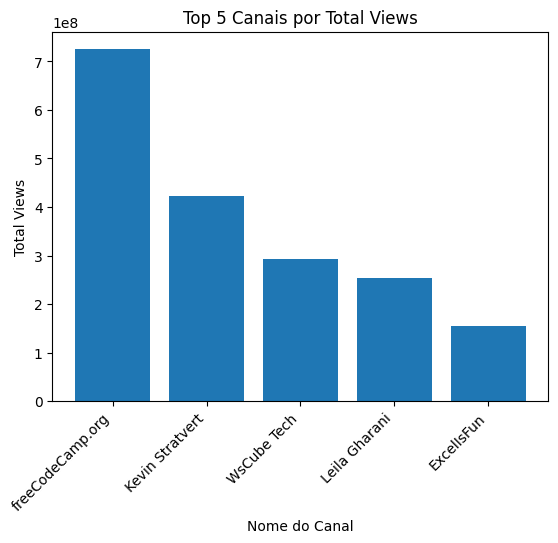

In [ ]:
# Canais com maior número de visualizações 
plt.bar(top_channels['Channel_Name'], top_channels['Views'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Views')
plt.xlabel('Nome do Canal')
plt.title('Top 5 Canais por Total Views')
plt.show()


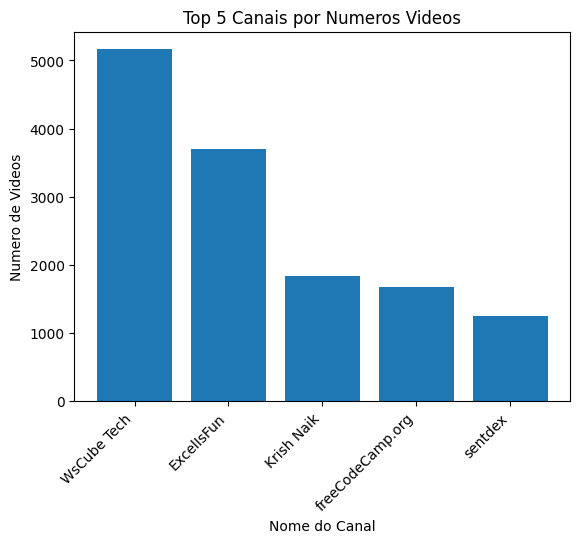

In [88]:
# Distribuição de vídeos por canal 
plt.bar(video_count_per_channel['Channel_Name'][:5], video_count_per_channel['Video_Count'][:5])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Numero de Videos')
plt.xlabel('Nome do Canal')
plt.title('Top 5 Canais por Numeros Videos')
plt.show()


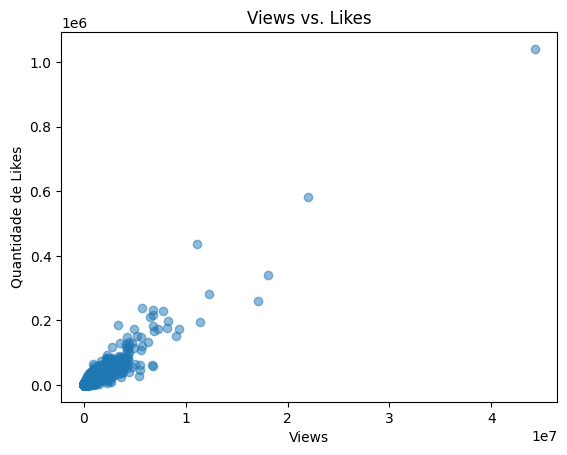

In [90]:
# Relação entre visualizações, curtidas e comentários 
plt.scatter(df['Views'], df['Like_count'], alpha=0.5)
plt.xlabel('Views')
plt.ylabel('Quantidade de Likes')
plt.title('Views vs. Likes')
plt.show()


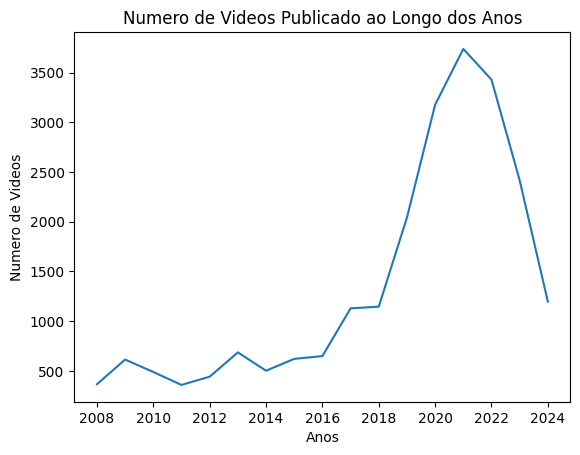

In [91]:
# Tendências temporais 
df['Year'] = pd.to_datetime(df['Published_date']).dt.year
videos_per_year = df['Year'].value_counts().sort_index()

plt.plot(videos_per_year.index, videos_per_year.values)
plt.xlabel('Anos')
plt.ylabel('Numero de Videos')
plt.title('Numero de Videos Publicado ao Longo dos Anos')
plt.show()


In [93]:
# Salvar o DataFrame modificado em um novo arquivo CSV
df.to_csv('youtube_dataset_atualizado.csv', index=False)

print("Arquivo CSV salvo com sucesso!")

Arquivo CSV salvo com sucesso!
